## Importing Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [130]:
# Open up our CSV files located in the /Data subfolder
salaries_df = pd.read_csv("../Data/nba_salaries_1990_to_2018.csv")
player_data_df = pd.read_csv("../Data/player_data.csv")
players_df = pd.read_csv("../Data/Players.csv")
seasons_stats_df = pd.read_csv("../Data/Seasons_Stats.csv")
salary_cap_df = pd.read_csv("../Data/salary_cap.csv")
draft_pos_df = pd.read_excel("../Data/NBA_Drafts.xlsx")

# For only 2017-2018 players
twitter_df = pd.read_csv("../Data/social-power-nba/nba_2017_twitter_players.csv")
pie_df = pd.read_csv("../Data/social-power-nba/nba_2017_pie.csv")
extra_df = pd.read_csv("../Data/social-power-nba/nba_2017_players_stats_combined.csv")

In [131]:
# Glimpse of our data
salaries_df.head()

,player,salary,season_end,season_start,team,team_name
0,Moses Malone,2406000,1991,1990,ATL,Atlanta Hawks
1,Dominique Wilkins,2065000,1991,1990,ATL,Atlanta Hawks
2,Jon Koncak,1550000,1991,1990,ATL,Atlanta Hawks
3,Doc Rivers,895000,1991,1990,ATL,Atlanta Hawks
4,Rumeal Robinson,800000,1991,1990,ATL,Atlanta Hawks


In [132]:
player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [133]:
players_df.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [134]:
print(seasons_stats_df.columns)
seasons_stats_df.head()

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [135]:
salary_cap_df.head()

,Season,Nominal,Real
0,1984-85,"$3,600,000","$7,934,034"
1,1985-86,"$4,233,000","$9,153,509"
2,1986-87,"$4,945,000","$10,317,292"
3,1987-88,"$6,164,000","$12,354,015"
4,1988-89,"$7,232,000","$13,829,137"


In [136]:
draft_pos_df = draft_pos_df[['Round', 'Pick', 'Player']]
draft_pos_df.head()

,Round,Pick,Player
0,1,1,Markelle Fultz
1,2,2,Lonzo Ball
2,3,3,Jayson Tatum
3,4,4,Josh Jackson
4,5,5,De'Aaron Fox


In [137]:
twitter_df.head()

,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0


In [138]:
pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [139]:
extra_df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47


# Clean data

In [140]:
# We only have salary information from 1990 onwards
clean_player_data_df = player_data_df[player_data_df['year_end'] >= 1990]

In [141]:
clean_seasons_stats_df = seasons_stats_df[seasons_stats_df['Year'] >= 1990].drop(['Unnamed: 0', 'blanl', 'blank2'], 'columns')
clean_seasons_stats_df = clean_seasons_stats_df.groupby('Player').apply(lambda x: x.drop_duplicates(subset=['Year'])).reset_index(drop=True)

In [142]:
clean_body_stats_df = players_df[['Player', 'height', 'weight']]

In [143]:
clean_salaries_df = salaries_df.drop(['team', 'team_name'], 'columns')

In [144]:
salary_cap_df['Season'] = salary_cap_df['Season'].str.split("-").str[0].astype(int)
salary_cap_df = salary_cap_df.set_index('Season')
salary_cap_df = salary_cap_df[salary_cap_df.columns[0:]].replace('[\$,]', '', regex=True).astype(float)
salary_cap_df = salary_cap_df.dropna()
salary_cap_df.rename(columns={'Nominal':'salary_cap_nominal', 'Real':'salary_cap_real'}, inplace=True)
salary_cap_df.head()

,salary_cap_nominal,salary_cap_real
Season,,
1984,3600000.0,7934034.0
1985,4233000.0,9153509.0
1986,4945000.0,10317292.0
1987,6164000.0,12354015.0
1988,7232000.0,13829137.0


# Analyzing raw data

### Examining Salary Inflation

In [145]:
salary_cap_df.head()

,salary_cap_nominal,salary_cap_real
Season,,
1984,3600000.0,7934034.0
1985,4233000.0,9153509.0
1986,4945000.0,10317292.0
1987,6164000.0,12354015.0
1988,7232000.0,13829137.0


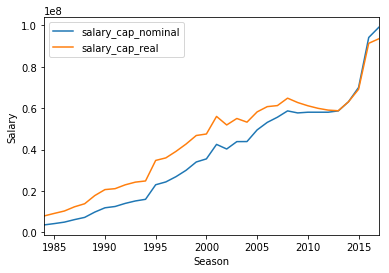

In [146]:
# Looking at the salary cap inflation over time
lines = salary_cap_df.plot.line()
plt.ylabel('Salary')
plt.show()

In [ ]:
# Get the average salary over the years 1990-2018
avg_salaries = salaries_df.groupby('season_end')['salary', 'season_end'].transform('mean').drop_duplicates()
avg_salaries.columns = ['Average Salary', 'Season']
avg_salaries = avg_salaries.set_index('Season')
avg_salaries.plot.line()
plt.ylabel('Average Salary')
plt.show()

In [ ]:
salary_cap_df = pd.concat([salary_cap_df, avg_salaries], axis=1, join_axes=[salary_cap_df.index])
salary_cap_df.head()

In [ ]:
lines = salary_cap_df.plot.line()
plt.ylabel('Salary')
plt.show()

We see that the average salary is much below the salary cap.  This is because the salary cap is the absolute maximum a NBA team can pay their entire roster (before entering the luxury tax), whereas the average salary is for just a single NBA player.  A better comparison would be to compare the relationship between the salary cap inflation and the average salary inflation (and maybe compare to the US inflation).

In [ ]:
salary_inflation = salary_cap_df.pct_change()
lines = salary_inflation.plot.line()
plt.ylabel('Inflation')
plt.show()

We see that there isn't too strong of a correlation between the inflation in the salary cap and the inflation in player salaries.  In building our models, we will again test if including the particular season's salary cap (instead of just the year) improves our performance.  Our examination of the salary cap and salaries inflation indicates that it may to some extent.

### Examining salary distribution

In this section, we want to examine the distribution of player salaries.

In [ ]:
sample_years = [2018,2010,2002,1994]
for year in sample_years:
    salaries = clean_salaries_df[clean_salaries_df['season_end'] == year]['salary']
    plt.hist(salaries)
    plt.xlabel('Salary')
    plt.title(year)
    plt.show()

As we would expect, salaries are quite right-skewed distributions and are becoming increasingly so. We try to make the distribution a bit more "normal":

In [ ]:
import math
salaries_2006 = clean_salaries_df[clean_salaries_df['season_end'] == 2006]['salary']
plt.hist(salaries.map(math.log))
plt.xlabel('Salary')
plt.title('Log Transform')
plt.show()
plt.hist(salaries.map(math.sqrt))
plt.xlabel('Salary')
plt.title('Square Root Transform')
plt.show()
plt.hist(salaries.map(lambda x: math.pow(x, 1/3)))
plt.xlabel('Salary')
plt.title('Cube Root Transform')
plt.show()

# Transform data

In [ ]:
from scipy import stats

In [ ]:
features_seasons_stats_df = clean_seasons_stats_df.copy()

In [ ]:
features_body_stats_df = clean_body_stats_df.copy()
features_body_stats_df.head()

# Join data

In [147]:
features_salaries_df = clean_salaries_df.copy()
features_salaries_df['cube_root_salary'] = np.cbrt(features_salaries_df['salary']) #.map(lambda x: math.pow(x, 1/3))
features_salaries_df['season_salary_z'] = features_salaries_df.groupby('season_end')['cube_root_salary'].transform(stats.zscore)
features_salaries_df['next_season_salary_z'] = features_salaries_df.groupby('player')['season_salary_z'].shift(-1)
features_salaries_df = features_salaries_df.dropna(subset=['next_season_salary_z'])
features_salaries_df.head()

,player,salary,season_end,season_start,cube_root_salary,season_salary_z,next_season_salary_z
0,Moses Malone,2406000,1991,1990,133.998069,1.895577,0.990715
1,Dominique Wilkins,2065000,1991,1990,127.342494,1.623581,2.102462
2,Jon Koncak,1550000,1991,1990,115.729453,1.148985,1.338753
3,Doc Rivers,895000,1991,1990,96.369812,0.357806,0.572878
4,Rumeal Robinson,800000,1991,1990,92.831777,0.213215,0.368960


In [220]:
features_df = features_seasons_stats_df.merge(features_body_stats_df, how='inner', on='Player')
features_df = features_df.merge(features_salaries_df, how='inner', left_on=['Player', 'Year'], right_on=['player', 'season_end'])

features_df = features_df.merge(draft_pos_df, how='left', left_on=['player'], right_on=['Player'])

features_df = features_df.merge(salary_cap_df, how='inner', left_on=['Year'], right_on=['Season'])

# Get how long they've played so far
year_start_df = player_data_df[['name', 'year_start']]
features_df = features_df.merge(year_start_df, how='left', left_on=['player'], right_on=['name']) # USING INNER HERE MAKES R^2 LOWER????
features_df['years_played'] = features_df['season_end'] - features_df['year_start']

# Pretty much a late 2nd round pick???
features_df['Round'].fillna(2, inplace=True)
features_df['Pick'].fillna(61, inplace=True)

# features_df = features_df.drop(['Year', 'Player'], 'columns').set_index(['player', 'season_end'])
features_df = features_df.drop(['Year', 'Player_x', 'Player_y', 'name', 'year_start'], 'columns').set_index(['player', 'season_end'])
features_df

,,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,...,salary,season_start,cube_root_salary,season_salary_z,next_season_salary_z,Round,Pick,salary_cap_nominal,salary_cap_real,years_played
player,season_end,,,,,,,,,,,,,,,,,,,,,
A.C. Green,1991,PF,27.0,LAL,82.0,21.0,2164.0,13.8,0.556,0.101,0.557,...,1750000,1990,120.507113,1.344236,1.127381,2.0,61.0,12500000.0,21113943.0,5
A.J. English,1991,SG,23.0,WSB,70.0,12.0,1443.0,10.6,0.480,0.054,0.274,...,275000,1990,65.029572,-0.922991,-0.867020,2.0,37.0,12500000.0,21113943.0,0
A.J. Wynder,1991,PG,26.0,BOS,6.0,0.0,39.0,7.6,0.387,0.083,0.667,...,30000,1990,31.072325,-2.310738,-1.564354,2.0,61.0,12500000.0,21113943.0,0
Adrian Caldwell,1991,PF,24.0,HOU,42.0,0.0,343.0,8.6,0.426,0.012,0.205,...,275000,1990,65.029572,-0.922991,-1.365633,2.0,61.0,12500000.0,21113943.0,1
Alaa Abdelnaby,1991,PF,22.0,POR,43.0,0.0,290.0,13.1,0.499,0.000,0.379,...,395000,1990,73.372339,-0.582043,-0.470178,1.0,25.0,12500000.0,21113943.0,0
Alan Ogg,1991,C,23.0,MIA,31.0,1.0,261.0,7.4,0.455,0.036,0.182,...,130000,1990,50.657970,-1.510322,-1.255421,2.0,61.0,12500000.0,21113943.0,0
Alec Kessler,1991,C,24.0,MIA,78.0,18.0,1259.0,8.4,0.462,0.009,0.280,...,1600000,1990,116.960710,1.199304,0.487852,1.0,12.0,12500000.0,21113943.0,0
Alton Lister,1991,C,32.0,GSW,77.0,65.0,1552.0,10.7,0.509,0.003,0.514,...,1700000,1990,119.348319,1.296879,0.724596,2.0,61.0,12500000.0,21113943.0,9
Alvin Robertson,1991,SG,28.0,MIL,81.0,81.0,2598.0,18.6,0.538,0.070,0.291,...,870000,1990,95.464027,0.320789,0.379042,2.0,61.0,12500000.0,21113943.0,6


In [221]:
features_df.columns.tolist()

['Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'height',
 'weight',
 'salary',
 'season_start',
 'cube_root_salary',
 'season_salary_z',
 'next_season_salary_z',
 'Round',
 'Pick',
 'salary_cap_nominal',
 'salary_cap_real',
 'years_played']

# Feature selection

In [233]:
# [G, GS, MP, PER, TS%, 3PAr, FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, USG%, blanl, OWS, DWS, WS, WS/48, blank2, OBPM, DBPM, BPM, VORP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS]
features = [
 'Pos',
 'Age',
 #'Tm',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'height',
 'weight',
 #'salary',
 #'season_start',
 'season_salary_z',
 'salary_cap_nominal',
 'salary_cap_real',
 'Round',
 'Pick',
 'years_played'
]

In [234]:
features_df = features_df.dropna()
X_df = features_df[features]
y_df = features_df["next_season_salary_z"]
X_df = pd.concat([X_df,pd.get_dummies(X_df['Pos'], prefix='Pos')],axis=1)
X_df = X_df.drop(['Pos'], axis=1)
X_df = X_df.drop(['season_salary_z'], axis=1)
X_df.head()
# list(X_df.columns.values)

,,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,Pos_PG,Pos_PG-SF,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-SG,Pos_SG,Pos_SG-PF,Pos_SG-PG,Pos_SG-SF
player,season_end,,,,,,,,,,,,,,,,,,,,,
A.C. Green,1991,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,0.557,11.3,16.2,...,0,0,0,0,0,0,0,0,0,0
A.J. English,1991,23.0,70.0,12.0,1443.0,10.6,0.480,0.054,0.274,5.0,6.2,...,0,0,0,0,0,0,1,0,0,0
A.J. Wynder,1991,26.0,6.0,0.0,39.0,7.6,0.387,0.083,0.667,3.1,5.2,...,1,0,0,0,0,0,0,0,0,0
Adrian Caldwell,1991,24.0,42.0,0.0,343.0,8.6,0.426,0.012,0.205,13.4,17.6,...,0,0,0,0,0,0,0,0,0,0
Alan Ogg,1991,23.0,31.0,1.0,261.0,7.4,0.455,0.036,0.182,6.3,14.8,...,0,0,0,0,0,0,0,0,0,0


In [235]:
# Optionally we can normalize all features (this gives super whack results for the testing/training scores)
# # Get column names first
# names = X_df.columns
# # Create the Scaler object
# scaler = preprocessing.StandardScaler()
# # Fit your data on the scaler object
# scaled_df = scaler.fit_transform(X_df)
# X_df = pd.DataFrame(scaled_df, columns=names)

# Data partitioning

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X = X_df.values
y = y_df.values
y_c = pd.qcut(y, 5, labels=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_c_train, y_c_test = train_test_split(X, y_c, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5339, 69)
(5339,)
(2289, 69)
(2289,)


# Train

In [238]:
from sklearn.model_selection import cross_validate

## Basic Regression Models

### Linear Models

In [239]:
from sklearn import linear_model, svm, kernel_ridge

In [240]:
# Ordinary Least Squares Regression
ols = linear_model.LinearRegression()
results = cross_validate(ols, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.4807025000732007
Average Training Score: 0.4985452598208996


In [230]:
# Ridge Regression
ridge = linear_model.Ridge()
results = cross_validate(ridge, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.4826983175764938
Average Training Score: 0.49983660014935205


In [231]:
# Lasso Regression
lasso = linear_model.Lasso()
results = cross_validate(lasso, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.3946071410037934
Average Training Score: 0.39977474569229116


In [232]:
# Elastic Net Regression
elastic = linear_model.ElasticNet()
results = cross_validate(elastic, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.4372601504413174
Average Training Score: 0.44323873439387607


In [218]:
# Kernel Ridge Regression
krr = kernel_ridge.KernelRidge(kernel='poly', degree=3)
results = cross_validate(krr, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.39042829600728374
Average Training Score: 0.40901585659601397


### SVR

In [45]:
linear_svr = svm.SVR(kernel='linear')
cross_validate(linear_svr, X_train, y_train, scoring='r2', cv=5, n_jobs=5)

KeyboardInterrupt: 

In [ ]:
rbf_svr = svm.SVR(kernel='rbf', gamma='scale')
cross_validate(rbf_svr, X_train, y_train, scoring='r2', cv=5, n_jobs=5)

## Classification Models

### SVC

In [ ]:
linear_svc = svm.SVC(kernel='linear')
cross_validate(linear_svc, X_train, y_c_train, scoring='accuracy', cv=5, n_jobs=5)

# Principal Component Analysis

## Setting up PCA

In [ ]:
# Have to collapse rows to not have repeated names
new_features_df = features_df.copy()
#new_features_df.index = new_features_df.index.droplevel(2)
new_features_df = new_features_df.reset_index()
new_features_df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

if 'Pos' in features:
    features.remove('Pos')

# Separating out the features

x = new_features_df.loc[:, features].values
# Separating out the target
y = new_features_df.loc[:,['next_season_salary_z']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

In [ ]:
finalDf = pd.concat([principalDf, new_features_df[['next_season_salary_z']]], axis = 1)
finalDf.head()

## Further PCA Experimentation

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# TODO: 3-Plot of the 2 components and the salary

In [ ]:
# Explained variance for each component
pca.explained_variance_ratio_

## Models using PCA

In [ ]:
# TODO